# Big Data Science met Python

## Dag 1 voorbeelden en hands-on sessie

Hieronder staan de voorbeelden die in de presentatie voorbij zijn gekomen, daarna volgt de hands-on sessie

In [1]:
# Begin je notebook altijd met het importeren van reeds geïnstalleerde relevante packages

import pandas as pd                  #Pandas
import numpy as np                   #Numpy
from pydataset import data           #In deze package staan voorbeeld datasets zoals deze ook beschikbaar zijn in R
import matplotlib                    #Matplotlib is een package waar je makkelijk veel verschillende soorten plots mee maakt
import matplotlib.pyplot as plt      #Meest gebruikte onderdeel uit de matplotlib package

#specifieke line code om output van matplotlib te plotten in je notebook
%matplotlib inline                   

### 0- In de presentatie wordt de dataset "airquality"gebruikt uit de pydataset package. Deze moet eerst ingeladen worden.

In [2]:
df = data("airquality")

### 1- Validatie van de data

Bekijk de afmetingen van het dataframe

In [3]:
df.shape

(153, 6)

Bekijk hoe de data er uit ziet

In [4]:
df.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


Wat voor datatypen zitten er in de ingeladen dataset

In [5]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
dtype: object

Bekijk expliciet hoeveel missende waarden er voorkomen in de dataset

In [6]:
df.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

Soms is het handiger om te kijken hoeveel procent van elke kolom leeg is. Dit geeft een beter beeld

In [7]:
print df.isnull().sum()/len(df)* 100

Ozone      24.183007
Solar.R     4.575163
Wind        0.000000
Temp        0.000000
Month       0.000000
Day         0.000000
dtype: float64


Algmene beschrijvende statistieken van de dataset

In [8]:
df.describe()

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,NaN,NaN,7.400000,72.000000,6.000000,8.000000
50%,NaN,NaN,9.700000,79.000000,7.000000,16.000000
75%,NaN,NaN,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


### 2- Exploratie

Bekijk als er datumranges in een dataset zitten, of deze compleet zijn

Dit kan visueel:

In [9]:
df.groupby('Month')['Day'].size()

Month
5    31
6    30
7    31
8    31
9    30
dtype: int64

Of meer gestandaardiseerd
1. Maak een datum van de aanwezige datum-onderdelen in de dataset
2. Maak met pandas een range van de minimale datum tot maximale datum (deze is dus volledig)
3. Vergelijk de lengtes van deze twee variabelen om te concluderen of de range compleet is

In [10]:
df_dat =pd.to_datetime('2016/'+df['Month'].map(str)+'/'+df['Day'].map(str),format='%Y/%m/%d')
range_dat = pd.date_range(min(df_dat),max(df_dat))
print 'Is the time line complete?',len(df_dat) == len(range_dat)

Is the time line complete? True


Krijg een idee van wat de ranges in de dataset zijn en ook voor hun extreme waarden

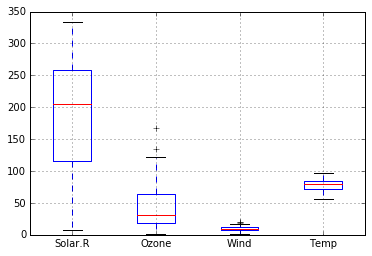

In [11]:
df.boxplot(['Solar.R','Ozone','Wind','Temp'],return_type='axes');

Bepaal een aanpak voor de missende waarden, door de features met missende waarden te plotten en naar hun distributies te kijken

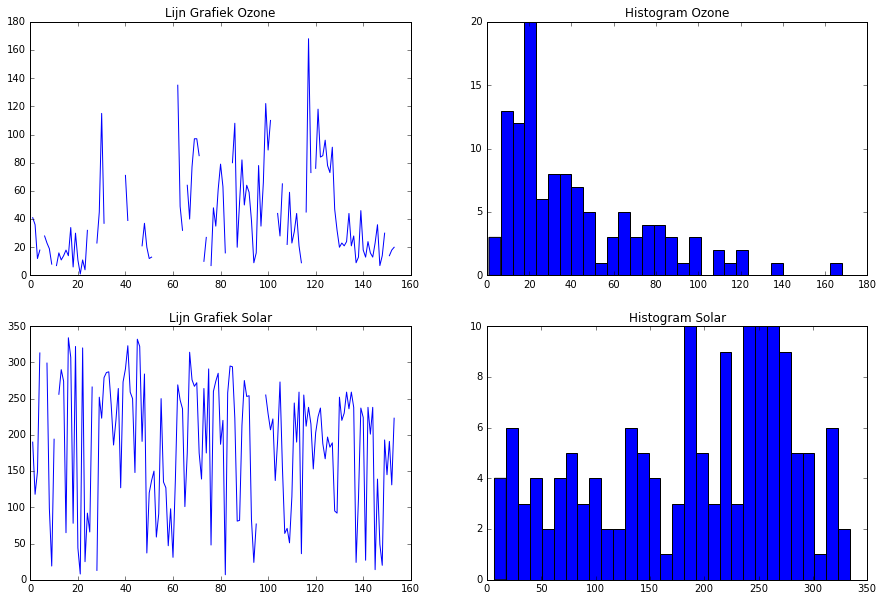

In [12]:
plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.title('Lijn Grafiek Ozone')
plt.plot(df['Ozone']);
plt.subplot(222)
plt.title('Histogram Ozone')
plt.hist(df['Ozone'].dropna(),bins=30);
plt.subplot(223)
plt.title('Lijn Grafiek Solar')
plt.plot(df['Solar.R']);
plt.subplot(224)
plt.title('Histogram Solar')
plt.hist(df['Solar.R'].dropna(),bins=30);

Aanpak 1: Interpoleren

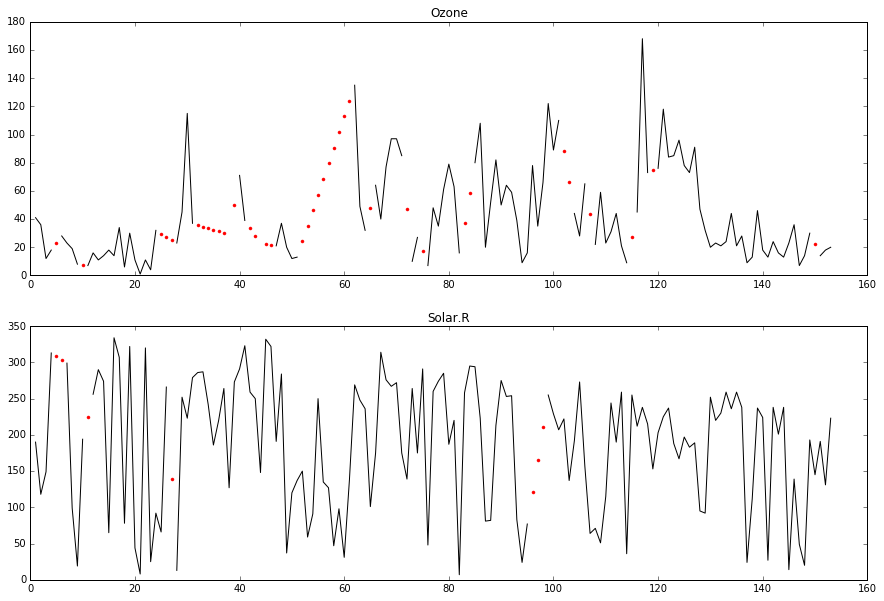

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title('Ozone')
a = df['Ozone'].interpolate()[df['Ozone'].isnull()]
plt.plot(df.index, df['Ozone'],'k',a.reindex(df.index) , 'r.');
plt.subplot(212)
plt.title('Solar.R')
b = df['Solar.R'].interpolate()[df['Solar.R'].isnull()]
plt.plot(df.index, df['Solar.R'],'k',b.reindex(df.index) , 'r.');

Aanpak 2: Gemiddelde gebruiken

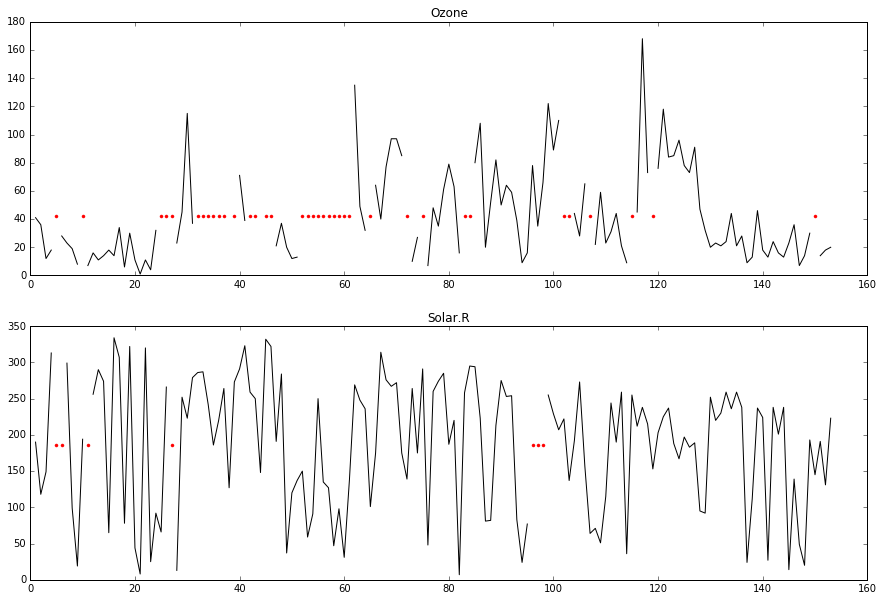

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title('Ozone')
a = df['Ozone'].fillna(np.mean(df['Ozone'].dropna()))[df['Ozone'].isnull()]
plt.plot(df.index, df['Ozone'],'k',a.reindex(df.index) , 'r.')
plt.subplot(212)
plt.title('Solar.R')
b = df['Solar.R'].fillna(np.mean(df['Solar.R'].dropna()))[df['Solar.R'].isnull()]
plt.plot(df.index, df['Solar.R'],'k',b.reindex(df.index) , 'r.')

Aanpak 3: Vorige waarden nemen -> Pad

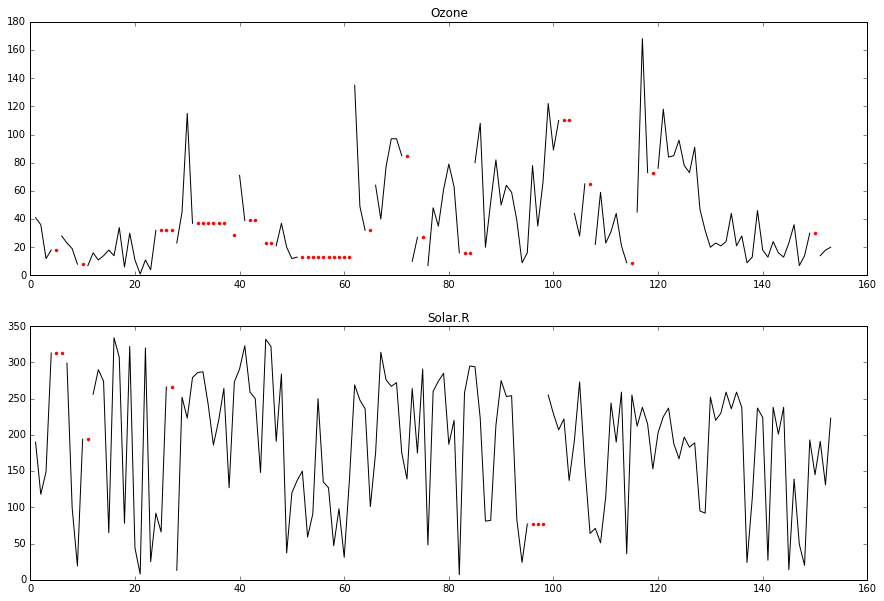

In [15]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
plt.title('Ozone')
a = df['Ozone'].fillna(method = 'pad')[df['Ozone'].isnull()]
plt.plot(df.index, df['Ozone'],'k',a.reindex(df.index) , 'r.')
plt.subplot(212)
plt.title('Solar.R')
b = df['Solar.R'].fillna(method = 'pad')[df['Solar.R'].isnull()]
plt.plot(df.index, df['Solar.R'],'k',b.reindex(df.index) , 'r.')

Er is niet 1 juiste manier om missende waarden in te vullen. Vaak kun je op basis van domeinkennis van de data het beste beslissen wat de beste manier is. Anders is het visueel inspecteren van manieren zoals hierboven een goede methodiek

In [16]:
df['Ozone'] = df['Ozone'].interpolate()
df['Solar.R'] = df['Solar.R'].interpolate()

Correlatie, plots en density bekijken

In [17]:
df[['Ozone','Solar.R','Wind','Temp']].corr()

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.159473,-0.507534,0.601636
Solar.R,0.159473,1.000000,-0.029280,0.229697
Wind,-0.507534,-0.029280,1.000000,-0.457988
Temp,0.601636,0.229697,-0.457988,1.000000


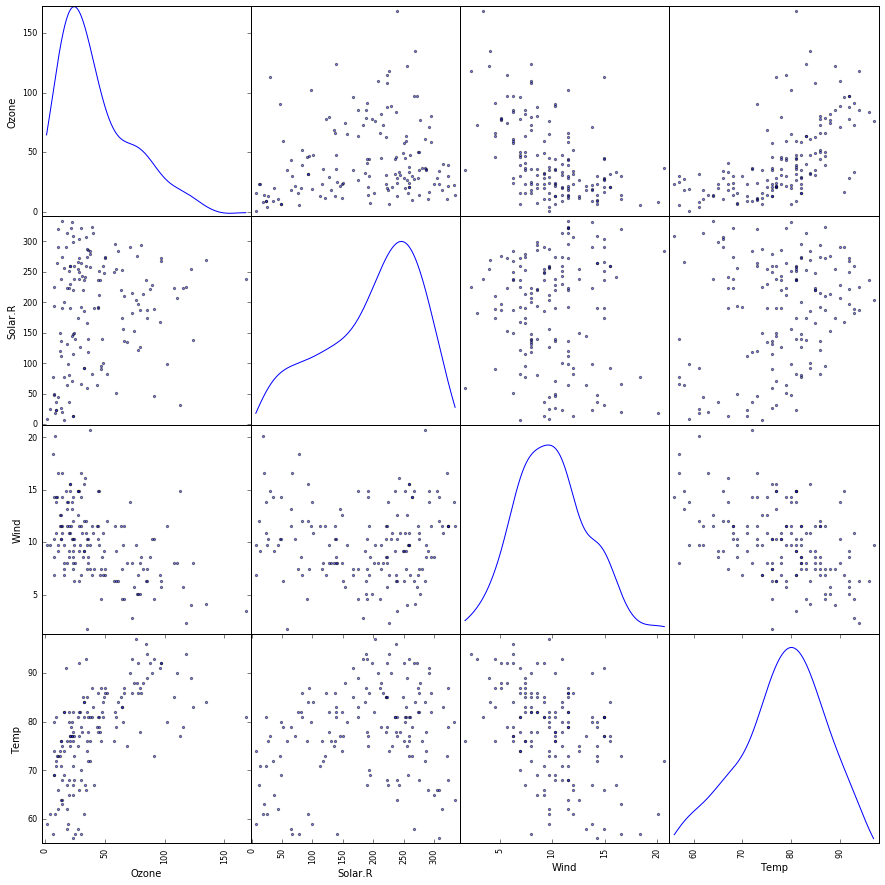

In [18]:
pd.tools.plotting.scatter_matrix(df[['Ozone','Solar.R','Wind','Temp']], figsize=(15, 15), diagonal='kde');

### 3- Transformatie

Toevoegen van maand dummies

In [19]:
df = pd.concat([df,pd.get_dummies(df['Month'],prefix="M")],axis=1)